In [1]:
!pip install -e ..

Obtaining file:///export/home/figs/vdesouza/work/Holography-1022/astrohack
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for astrohack (pyproject.toml) ... done
  Created wheel for astrohack: filename=astrohack-0.0.1-py3-none-any.whl size=1059 sha256=06aa67deff29d353eb3509beba5c19f1a9969629944b85bab9cc273444b0ad19
  Stored in directory: /tmp/pip-ephem-wheel-cache-5rri_vqk/wheels/93/bb/ed/46bdf801cce81c3aea69f1f4af83e386e0f89149047ab78ae0
Successfully built astrohack
  Attempting uninstall: astrohack
    Found existing installation: astrohack 0.0.1
    Uninstalling astrohack-0.0.1:
      Successfully uninstalled astrohack-0.0.1


In [2]:
from astrohack._utils._phase_fitting import create_phase_model, phase_fitting
from astrohack._classes.telescope import Telescope
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Simple Function to allow us to plot out phase images
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_phase_image(image):
    fig, ax = plt.subplots(1, 1, figsize=[10, 5])
    im = ax.imshow(image.T, cmap="viridis", interpolation="nearest")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, label="Z Scale", cax=cax)

In [4]:
# setting up a few telescope related parameters
npix = 256
ampimg = np.full((npix,npix),1)
vla = Telescope('VLA')
cellxy = 0.046875 # meters
wavelength = 0.34 # meters
enable = False
disable = True

In [5]:
# Setting the perturbations for the phase
phase_off = np.pi/4
x_pnt_off = 5 # Degrees per cell
y_pnt_off = -3 # degreess per cell
x_foc_off = 0.5 # mm
y_foc_off = -0.5 # mm
z_foc_off = 2 # mm
x_til_off = 10 # degrees
y_til_off = -2 # degrees
x_cas_off = 0 # mm
y_cas_off = 0 # mm
parameters = np.array([phase_off, x_pnt_off, y_pnt_off, x_foc_off, y_foc_off, z_foc_off, x_til_off, y_til_off, x_cas_off, y_cas_off])

In [6]:
%%time
# Here we create a model phase image from the phase perturbations added above
model = create_phase_model(npix, parameters, wavelength, vla, cellxy)

CPU times: user 732 ms, sys: 2.24 ms, total: 734 ms
Wall time: 738 ms


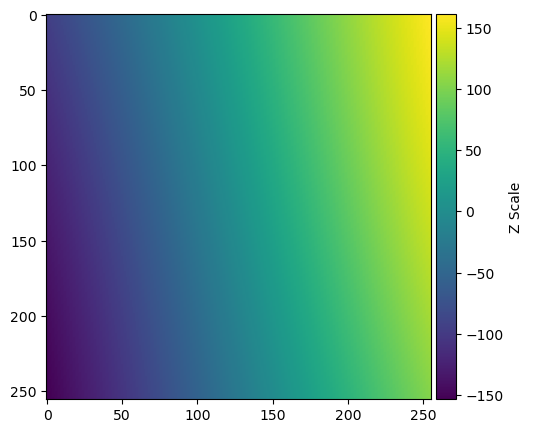

In [7]:
# here is the model we are using
plot_phase_image(model)

In [8]:
%%time
# here we do the actual phase fitting
fitting = phase_fitting(wavelength, vla, cellxy, ampimg, model, enable, enable, enable,
                       enable, disable)

CPU times: user 2.76 s, sys: 264 ms, total: 3.02 s
Wall time: 2.7 s


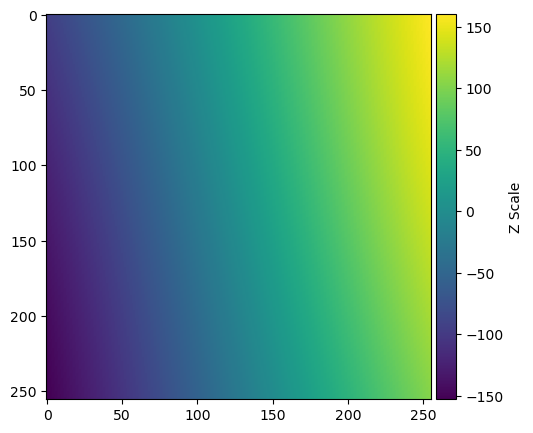

In [9]:
# here is the model derived from phase fitting
plot_phase_image(fitting[3])

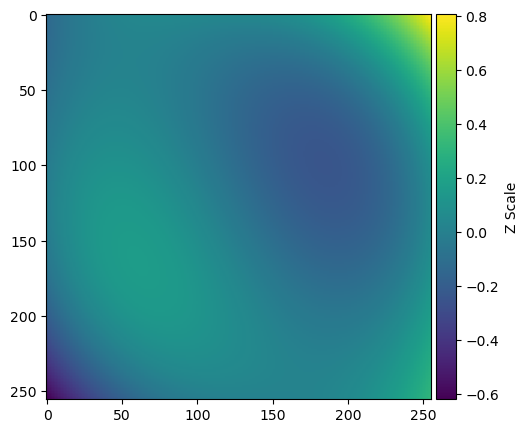

In [10]:
# here are the residuals after the phase fitting
plot_phase_image(fitting[2])

In [11]:
fitting[0]

array([ 1.65009436e-03,  3.00960209e-02, -1.59516093e-02,  1.01806588e-02,
       -7.95432128e-01,  2.40060633e+00,  1.07304010e+01, -2.44291756e+00,
        0.00000000e+00,  0.00000000e+00])